In [23]:
import pandas as pd
import os
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report

In [24]:
os.chdir("D://Bright_Academy//ML project//")

In [25]:
df=pd.read_csv("OHEdata.csv")

In [27]:
df.drop(['WindGustKmph','DewPointF','WindChillF','time','ArrTime','CRSDepTime','DepDelayMinutes'],axis=1,inplace=True)

In [28]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [29]:
X=df.iloc[:,:-1].values
y=df['ArrDel15'].values

In [8]:
y.shape

(1851421,)

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0,shuffle=True)

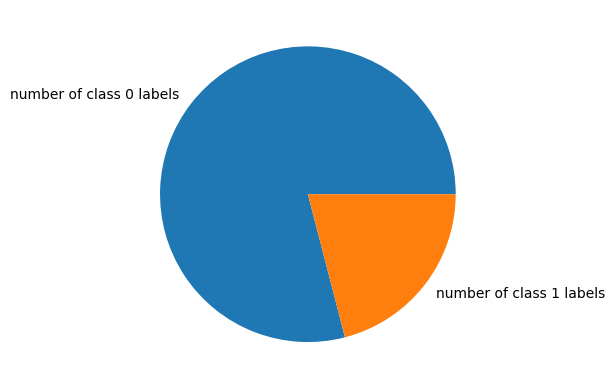

In [19]:
import matplotlib.pyplot as plt
cnt0=len(df[df['ArrDel15']==0])
cnt1=len(df[df['ArrDel15']==1])
vals=[cnt0,cnt1]
labels=['number of class 0 labels','number of class 1 labels']
plt.pie(vals,labels=labels)
plt.show()

# Logistic Regression(with scaling)

In [10]:
ss=StandardScaler()
xtrainscaled=ss.fit_transform(xtrain)
xtestscaled=ss.transform(xtest)

In [21]:
lr=LogisticRegression()
lr.fit(xtrainscaled,ytrain)

LogisticRegression()

In [22]:
ypred=lr.predict(xtestscaled)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94    438831
         1.0       0.79      0.75      0.77    116596

    accuracy                           0.91    555427
   macro avg       0.86      0.85      0.86    555427
weighted avg       0.90      0.91      0.91    555427



Inference: Class imbalance problem 

Resolving

# Random undersampling

In [31]:
rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(xtrain, ytrain)

print('original dataset shape:', Counter(ytrain))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0.0: 1024534, 1.0: 271460})
Resample dataset shape Counter({0.0: 271460, 1.0: 271460})


In [24]:
xtrainscaled=ss.fit_transform(x_rus)
xtestscaled=ss.transform(xtest)

lr1=LogisticRegression(solver='sag')
lr1.fit(xtrainscaled,y_rus)

ypred=lr1.predict(xtestscaled)
print(classification_report(ytest,ypred))

C:\Users\Harip\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94    438831
         1.0       0.78      0.76      0.77    116596

    accuracy                           0.90    555427
   macro avg       0.86      0.85      0.85    555427
weighted avg       0.90      0.90      0.90    555427



# Random Oversampling

In [21]:
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(xtrain, ytrain)
print('Original dataset shape', Counter(ytrain))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0.0: 1024534, 1.0: 271460})
Resample dataset shape Counter({0.0: 1024534, 1.0: 1024534})


In [22]:
xtrainscaled=ss.fit_transform(x_ros)
xtestscaled=ss.transform(xtest)

lr2=LogisticRegression()
lr2.fit(xtrainscaled,y_ros)

ypred=lr2.predict(xtestscaled)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94    438831
         1.0       0.78      0.76      0.77    116596

    accuracy                           0.90    555427
   macro avg       0.86      0.85      0.85    555427
weighted avg       0.90      0.90      0.90    555427



# Decision Trees(better accuracy than logreg)


In [25]:
tree=DecisionTreeClassifier(criterion='entropy')
xtrainscaled=ss.fit_transform(x_rus)
xtestscaled=ss.transform(xtest)

tree.fit(xtrainscaled,y_rus)

DecisionTreeClassifier(criterion='entropy')

In [26]:
ypred=tree.predict(xtestscaled)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.94      0.78      0.85    438831
         1.0       0.49      0.81      0.61    116596

    accuracy                           0.78    555427
   macro avg       0.71      0.79      0.73    555427
weighted avg       0.84      0.78      0.80    555427



# Random Forest Classifier(better than decision tree)

In [27]:
xtrainscaled=ss.fit_transform(x_rus)
xtestscaled=ss.transform(xtest)
rfc=RandomForestClassifier(n_jobs=-1)
rfc.fit(xtrainscaled,y_rus)

RandomForestClassifier(n_jobs=-1)

In [28]:
ypred=rfc.predict(xtestscaled)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92    438831
         1.0       0.67      0.83      0.74    116596

    accuracy                           0.88    555427
   macro avg       0.81      0.86      0.83    555427
weighted avg       0.89      0.88      0.88    555427



# XGBoost

In [32]:
xtrainscaled=ss.fit_transform(x_rus)
xtestscaled=ss.transform(xtest)
xgb=GradientBoostingClassifier()
xgb.fit(xtrainscaled,y_rus)

GradientBoostingClassifier()

In [33]:
ypred=xgb.predict(xtestscaled)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94    438831
         1.0       0.78      0.76      0.77    116596

    accuracy                           0.90    555427
   macro avg       0.86      0.85      0.85    555427
weighted avg       0.90      0.90      0.90    555427



# ExtraTrees Classifier

In [32]:
etc=ExtraTreesClassifier(max_depth=100,n_jobs=-1)

In [33]:
xtrainscaled=ss.fit_transform(x_rus)
xtestscaled=ss.transform(xtest)
etc.fit(xtrainscaled,y_rus)

ExtraTreesClassifier(max_depth=100, n_jobs=-1)

In [34]:
ypred=etc.predict(xtestscaled)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91    438831
         1.0       0.64      0.83      0.73    116596

    accuracy                           0.87    555427
   macro avg       0.80      0.86      0.82    555427
weighted avg       0.89      0.87      0.87    555427



# Result:

In [35]:
import pickle 
pickle.dump(xgb,open('cmodel.pkl','wb'))